In [3]:
!ls

arjun_zeropoint-k4m_160203_044546_ooi_zd_v2.fits
compare_zpts.ipynb
zeropoint-k4m_160203_044546_ooi_zd_v2.fits


In [70]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from thesis_code.fits import load
import numpy as np
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
j=load('zeropoint-k4m_160203_044546_ooi_zd_v2.fits')
a=load('arjun_zeropoint-k4m_160203_044546_ooi_zd_v2.fits')

In [44]:
a['ZPT']

26.354
26.354
26.354
26.354


In [17]:
print "rows: Arjun=%d, John=%d" % (len(j),len(a))
print "cols: Arjun=%d, John=%d" % (len(j[0]),len(a[0]))

def pset(s):
    print np.sort(list(s))

sj,sa= set(j.colnames),set([key.lower() for key in a.colnames])
print "Both:\n",pset(sj.intersection(sa))
print "Arjun Only:\n",pset(sa.difference(sj))
print "John Only:\n",pset(sj.difference(sa))

rows: Arjun=4, John=4
cols: Arjun=47, John=59
Both:
['airmass' 'avsky' 'ccdname' 'cd1_1' 'cd1_2' 'cd2_1' 'cd2_2' 'crpix1'
 'crpix2' 'crval1' 'crval2' 'date_obs' 'dec' 'expnum' 'exptime' 'filter'
 'ha' 'mjd_obs' 'object' 'propid' 'ra' 'ut' 'zpt']
None
Arjun Only:
['arawgain' 'badimg' 'ccddec' 'ccddecoff' 'ccddecrms' 'ccdhdunum'
 'ccdmdncol' 'ccdnmatch' 'ccdnmatcha' 'ccdnmatchb' 'ccdnmatchc'
 'ccdnmatchd' 'ccdnstar' 'ccdnum' 'ccdphoff' 'ccdphrms' 'ccdra' 'ccdraoff'
 'ccdrarms' 'ccdskycounts' 'ccdskymag' 'ccdskyrms' 'ccdtransp' 'ccdzpt'
 'ccdzpta' 'ccdzptb' 'ccdzptc' 'ccdzptd' 'filename' 'fwhm' 'naxis1'
 'naxis2' 'psfab' 'psfpa' 'seeing' 'temp']
None
John Only:
['camera' 'dec_bore' 'decoff' 'decrms' 'expid' 'gain' 'height'
 'image_filename' 'image_hdu' 'mdncol' 'nmatch' 'nstar' 'phoff' 'phrms'
 'pixscale' 'ra_bore' 'raoff' 'rarms' 'skycounts' 'skymag' 'skyrms'
 'transp' 'width' 'zptavg']
None


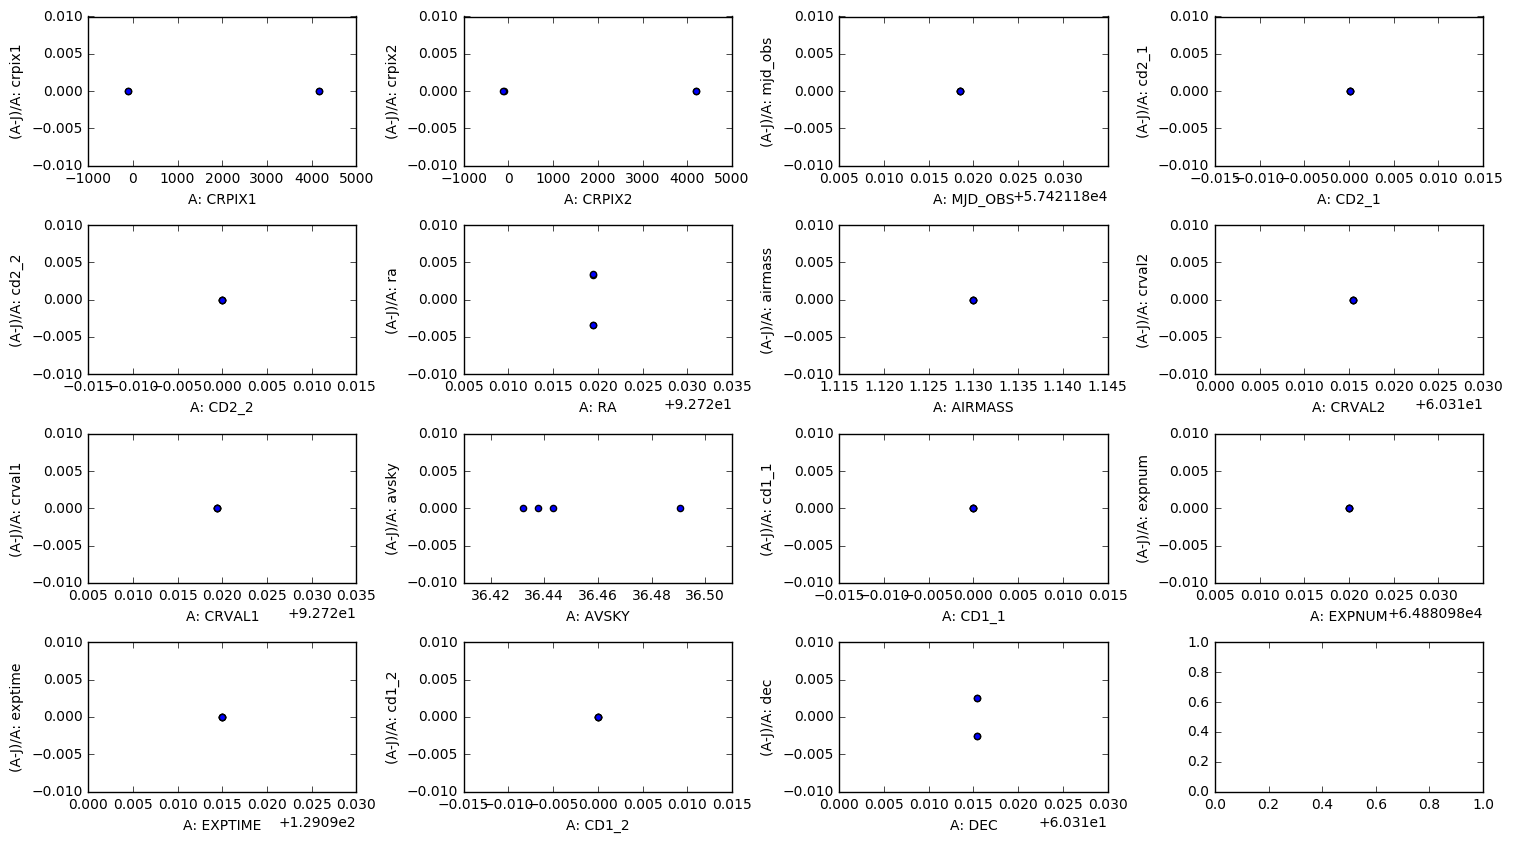

In [86]:
# Same Name keys
fig,axes= plt.subplots(4,4,figsize=(18,10))
ax=axes.flatten()
hw=0.4
plt.subplots_adjust(hspace=hw,wspace=hw)
cnt=-1
for key in sj.intersection(sa):
    if key in ['date_obs','filter','object','propid','ccdname']:
        continue
    if key in ['ha','ut']:
        continue
    if key in ['zpt']:
        continue #A zpt not -> J zpt
    cnt+=1
    y= (a[key.upper()] - j[key])/a[key.upper()]
    ax[cnt].scatter(a[key.upper()],y) 
    xlab=ax[cnt].set_xlabel('A: %s' % key.upper())
    ylab=ax[cnt].set_ylabel('(A-J)/A: %s' % key)
    ax[cnt].set_ylim([-0.01,0.01])
plt.savefig("same_key.png",\
            bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)
    

In [100]:
%%file maps.py

def a2j(key):
    d= dict(arawgain='gain',\
            ccddec='dec_bore',\
            ccdra='ra_bore',\
            ccddecoff='decoff',\
            ccdraoff='raoff',\
            ccddecrms='decrms',\
            ccdrarms='rarms',\
            ccdhdunum='image_hdu',\
            ccdmdncol='mdncol',\
            ccdnmatch='nmatch',\
            ccdnstar='nstar',\
            ccdphoff='phoff',\
            ccdphrms='phrms',\
            ccdskycounts='skycounts',\
            ccdskymag='skymag',\
            ccdskyrms='skyrms',\
            ccdtransp='transp',\
            ccdzpt='zpt',\
            zpt='zptavg',\
            filename='image_filename',\
            naxis1='width',\
            naxis2='height')
    return d[key]

def lims_for_key(key):
    d= dict(arawgain=0.05,\
            ccddec=0.05,\
            ccdra=0.05,\
            ccddecoff='none',\
            ccdraoff='none',\
            ccddecrms='none',\
            ccdrarms='none',\
            ccdhdunum='none',\
            ccdmdncol=0.15,\
            ccdnmatch='none',\
            ccdnstar='none',\
            ccdphoff='none',\
            ccdphrms='none',\
            ccdskycounts='none',\
            ccdskymag='none',\
            ccdskyrms='none',\
            ccdtransp='none',\
            ccdzpt=0.05,\
            zpt=0.05,\
            filename='none',\
            naxis1='none',\
            naxis2='none')
    return d[key]

def a_not_in_j():
    return ['badimg','ccdnum',\
          'ccdnmatcha','ccdnmatchb','ccdnmatchc','ccdnmatchd',\
          'ccdzpta','ccdzptb','ccdzptc','ccdzptd',\
          'fwhm','psfab','psfpa','seeing','temp']
    
def j_not_in_a():
    return ['camera','expid','pixscale']

Overwriting maps.py


cnt=19


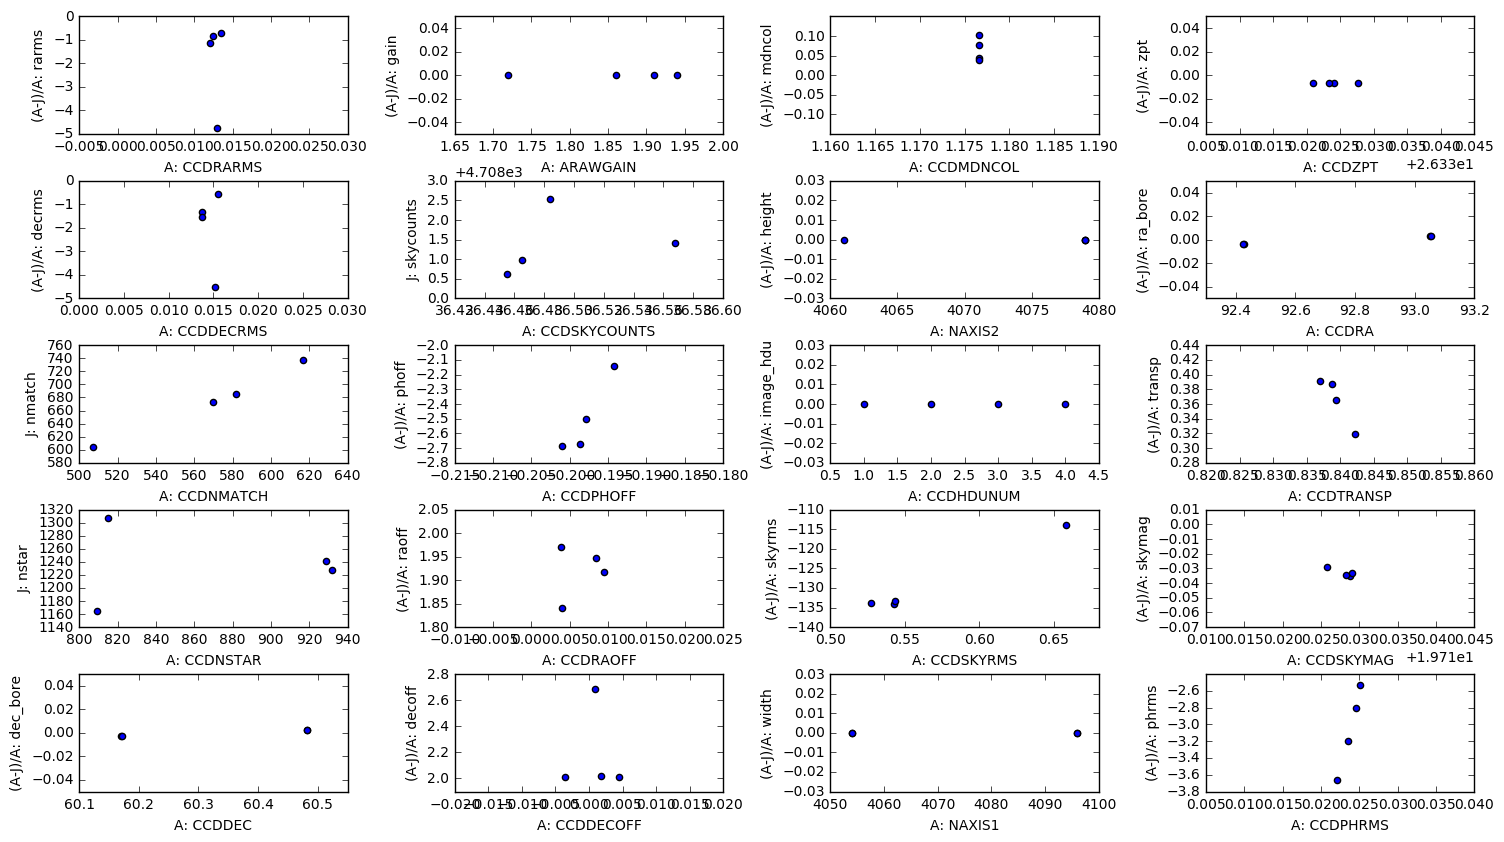

In [93]:
# Map Name keys
import maps
fig,axes= plt.subplots(5,4,figsize=(18,10))
ax=axes.flatten()
hw=0.4
plt.subplots_adjust(hspace=hw,wspace=hw)
cnt=-1
# Arjun only
for key in sa.difference(sj):
    #avoid= 
    if key in maps.a_not_in_j():
        continue
    if key in ['filename']:
        continue
    cnt+=1
    if key in ['ccdnmatch','ccdnstar','ccdskycounts']:
        y= j[ maps.a2j(key) ]
        ax[cnt].scatter(a[key.upper()],y) 
        xlab=ax[cnt].set_xlabel('A: %s' % key.upper())
        ylab=ax[cnt].set_ylabel('J: %s' % maps.a2j(key) )
    else:
        y= (a[key.upper()] - j[ maps.a2j(key) ])/a[key.upper()]
        ax[cnt].scatter(a[key.upper()],y) 
        xlab=ax[cnt].set_xlabel('A: %s' % key.upper())
        ylab=ax[cnt].set_ylabel('(A-J)/A: %s' % maps.a2j(key) )
    ylim= maps.lims_for_key(key)
    if ylim != 'none':
        ax[cnt].set_ylim([-ylim,ylim])
plt.savefig("mapped_key.png",\
            bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)
print "cnt=%d" % cnt

In [103]:
# String comparison
same= ['date_obs','filter','object','propid','ccdname','ha','ut']
mapped= ['filename']
for key in same:
    if a[key.upper()][0] != j[key][0]:
        print "Arjuns, Johns (%s)" % key
        for i in range(4): print a[key.upper()][i],j[key][i]
for key in mapped:
    if a[key.upper()][0] != j[ maps.a2j(key) ][0]:
        print "Arjuns, Johns (%s)" % key
        for i in range(4): print a[key.upper()][i],j[ maps.a2j(key) ][i]


Arjuns, Johns (ccdname)
ccd1 CCD1
ccd2 CCD2
ccd3 CCD3
ccd4 CCD4
Arjuns, Johns (filename)
k4m_160203_044546_ooi_zd_v2.fits /scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201
k4m_160203_044546_ooi_zd_v2.fits /scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201
k4m_160203_044546_ooi_zd_v2.fits /scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201
k4m_160203_044546_ooi_zd_v2.fits /scratch2/scratchdirs/kaylanb/cosmo/staging/mosaicz/MZLS_CP/CP201


In [106]:
j['camera']

mosaic3
mosaic3
mosaic3
mosaic3


In [108]:
# Different fields entirely
print "Arjun:"
for key in maps.a_not_in_j():
    print "%s: " % key, a[key.upper()][0]
    
print "\nJohn:"
for key in maps.j_not_in_a():
    print "%s: " % key, j[key][0]

Arjun:
badimg:  0
ccdnum:  1
ccdnmatcha:  146
ccdnmatchb:  162
ccdnmatchc:  149
ccdnmatchd:  160
ccdzpta:  26.3551
ccdzptb:  26.3491
ccdzptc:  26.3547
ccdzptd:  26.3523
fwhm:  1.746
psfab:  0.942975
psfpa:  34.8713
seeing:  1.895
temp:  -2.6

John:
camera:  mosaic3
expid:  00044546-CCD1
pixscale:  0.259624


# The problem: classification of hand-written digits

The folder `data/` contains 3 datasets: 

- `train_images.npy` contains 2000 images of hand-written digits (28x28 pixels) that have been previously identified by humans
- `train_labels.npy` contains the 2000 corresponding labels (integers from 0 to 9)
- `test_images.npy` contains 1000 **unlabeled** images of hand-written digits

**The aim is to automatically attribute the right label to the unlabeled digits.**


Let us have a look at the images and corresponding labels:

In [ ]:
# Load the data
train_images = np.load('./data/train_images.npy')
train_labels = np.load('./data/train_labels.npy')
test_images = np.load('./data/test_images.npy')

# Define function to have a look at the data
def show_random_digit( images, labels=None ):
    """"Show a random image out of `images`, 
    with the corresponding label if available"""
    i = np.random.randint(len(images))
    image = images[i].reshape((28, 28))
    plt.imshow( image, cmap='Greys' )
    if labels is not None:
        plt.title('Label: %d' %labels[i])

Let us first have a look at the images from the training set (labeled images).

In [ ]:
show_random_digit( train_images, train_labels )

We can also have a look at the images from the test set (unlabeled images)

In [ ]:
show_random_digit( test_images )

----

# Creating a python script that predicts the labels

In order to predict the labels, we will use the **nearest neighbor method**:  
For each of the images in the **test set**, we will search for the **most similar** image in the **training set**, and return the corresponding label.

Since the actual code for the nearest neighbor method is not of interest here, it has been **already implemented** in the folder `classification/` and we will only use it here as a **function call**.

Note: The implementation in `classification/` is naive and inefficient. `scikit-learn` has much more efficient implementation, but it has built-in parallel functionalities, which would not be suitable for this tutorial.

In [ ]:
from classification import nearest_neighbor_prediction
nearest_neighbor_prediction?

In addition, instead of performing the calculation **directly in the Jupyter notebook**, we will write a **Python script** that performs the calculation, and we will **execute** this script from the terminal.  
NB: This may seem odd, but it will make more sense when we compare this code with the corresponding `mpi4py` code.

Below, the line magic `%%file` allows us to write a Python script and save it as `serial_script.py`, without having to leave the notebook and open a text editor.

In [ ]:
%%file serial_script.py

import numpy as np
from classification import nearest_neighbor_prediction

# Load data
train_images = np.load('./data/train_images.npy')
train_labels = np.load('./data/train_labels.npy')
test_images = np.load('./data/test_images.npy')

# Predict the test labels and save it to a file
test_labels = nearest_neighbor_prediction( test_images, train_images, train_labels )
np.save('data/test_labels_serial.npy', test_labels )

In the line below, the character `!` allows to run the command line as if we were in a terminal.  
The line magic `%%time` allows to time the execution.

In [ ]:
%%time 
! python serial_script.py

The execution takes a substantial amount of time: the nearest neighbor method is simple but computationally expensive.

-----

# Checking the results 

The script saved the predicted labels in `test_labels_serial.npy`.  
Let us have a look at it, and check that the predicted labels match the images.

In [ ]:
test_labels = np.load('./data/test_labels_serial.npy')

In [ ]:
show_random_digit( test_images, test_labels )

-----
# Towards a parallel implementation

Up to now, the prediction of the labels was done on a **single core**.  
However, since the single-core execution is time consuming, it is desirable to execute the code on **several cores**.

Because the prediction of each label is **independent**, the parallelization is conceptually trivial: the set of 1000 unlabeled images should be **split** between the different cores, so that **each core** only takes care of a **fraction** of the unlabeled images.

Let us see how to implement this with `mpi4py` [here](./Classification_mpi4py.ipynb).